# Time Forecating of CO2 Emission Using Natural Gas by Simon Joshi

## Objective:

### Forecast the carbon emissions value for natural gas fuel type for the next 12 months and propose certain measures that can be adopted as policies to reduce these emissions.

## **Attributes Information:**

This datset is the monthly data of Carbon dioxide emissions from electricity generation from the US Energy Information Administration categorized by fuel type such as Coal, Natural gas etc.

**MSN:-** Reference to Mnemonic Series Names (U.S. Energy Information Administration Nomenclature)

**YYYYMM:-** The month of the year on which these emissions were observed

**Value:-** Amount of CO2 Emissions in Million Metric Tons of Carbon Dioxide

**Description:-**  Different category of electricity production through which carbon is emissioned.

In [1]:
#!pip install statsmodels --upgrade

In [2]:
#Import basic libraries
import pandas as pd
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Importing library for date manipulation
from datetime import datetime

#To calculate the MSE or RMSE
from sklearn.metrics import mean_squared_error

#Importing acf and pacf functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Importing models from statsmodels library
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
#Loading the data
df = pd.read_excel('MER_T12_06.xlsx')
df.head()

,MSN,YYYYMM,Value,Description
0,CLEIEUS,197301,72.076,Coal Electric Power Sector CO2 Emissions
1,CLEIEUS,197302,64.442,Coal Electric Power Sector CO2 Emissions
2,CLEIEUS,197303,64.084,Coal Electric Power Sector CO2 Emissions
3,CLEIEUS,197304,60.842,Coal Electric Power Sector CO2 Emissions
4,CLEIEUS,197305,61.798,Coal Electric Power Sector CO2 Emissions


In [4]:
#to ignore warnings
import warnings
import itertools
warnings.filterwarnings("ignore")

In [5]:
#Converting "YYYYMM" columnn into standard datetime format & making it as index


dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_excel('MER_T12_06.xlsx', parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.head(15)

#The arguments can be explained as:
#parse_dates: This is a key to identify the date time column. Example, the column name is ‘YYYYMM’.
# index_col: This is a key that forces pandas to use the date time column as index.
# date_parser: Converts an input string into datetime variable.

,MSN,Value,Description
YYYYMM,,,
1973-01-01,CLEIEUS,72.076,Coal Electric Power Sector CO2 Emissions
1973-02-01,CLEIEUS,64.442,Coal Electric Power Sector CO2 Emissions
1973-03-01,CLEIEUS,64.084,Coal Electric Power Sector CO2 Emissions
1973-04-01,CLEIEUS,60.842,Coal Electric Power Sector CO2 Emissions
1973-05-01,CLEIEUS,61.798,Coal Electric Power Sector CO2 Emissions
1973-06-01,CLEIEUS,66.538,Coal Electric Power Sector CO2 Emissions
1973-07-01,CLEIEUS,72.626,Coal Electric Power Sector CO2 Emissions
1973-08-01,CLEIEUS,75.181,Coal Electric Power Sector CO2 Emissions
1973-09-01,CLEIEUS,68.397,Coal Electric Power Sector CO2 Emissions


In [6]:
#split the description to a simple two word for ease of plotting graphs below.
df['Description_Short'] = df['Description'].str.split(' ').str[0] + df['Description'].str.split(' ').str[1]
df.head()

,MSN,Value,Description,Description_Short
YYYYMM,,,,
1973-01-01,CLEIEUS,72.076,Coal Electric Power Sector CO2 Emissions,CoalElectric
1973-02-01,CLEIEUS,64.442,Coal Electric Power Sector CO2 Emissions,CoalElectric
1973-03-01,CLEIEUS,64.084,Coal Electric Power Sector CO2 Emissions,CoalElectric
1973-04-01,CLEIEUS,60.842,Coal Electric Power Sector CO2 Emissions,CoalElectric
1973-05-01,CLEIEUS,61.798,Coal Electric Power Sector CO2 Emissions,CoalElectric


In [7]:
#Dropping the non datetime index row. Convert the index to datetime, coerce errors, and filter NaT
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)
# We are using errors=’coerce’. If 'coerce', then invalid parsing will be set as NaN

,MSN,Value,Description,Description_Short
YYYYMM,,,,
1973-01-01,CLEIEUS,72.076,Coal Electric Power Sector CO2 Emissions,CoalElectric
1973-02-01,CLEIEUS,64.442,Coal Electric Power Sector CO2 Emissions,CoalElectric
1973-03-01,CLEIEUS,64.084,Coal Electric Power Sector CO2 Emissions,CoalElectric
1973-04-01,CLEIEUS,60.842,Coal Electric Power Sector CO2 Emissions,CoalElectric
1973-05-01,CLEIEUS,61.798,Coal Electric Power Sector CO2 Emissions,CoalElectric
1973-06-01,CLEIEUS,66.538,Coal Electric Power Sector CO2 Emissions,CoalElectric
1973-07-01,CLEIEUS,72.626,Coal Electric Power Sector CO2 Emissions,CoalElectric
1973-08-01,CLEIEUS,75.181,Coal Electric Power Sector CO2 Emissions,CoalElectric
1973-09-01,CLEIEUS,68.397,Coal Electric Power Sector CO2 Emissions,CoalElectric


In [8]:
#Checking the datatypes of each column. 
ts.dtypes

MSN                  object
Value                object
Description          object
Description_Short    object
dtype: object

In [9]:
#All values are object
#Convert the emision value into numeric value
ts['Value'] = pd.to_numeric(ts['Value'], errors = 'coerce') #If 'coerce', then invalid parsing will be set as NaN

In [10]:
#Check total number of missing values of each column.
ts.isnull().sum()

MSN                    0
Value                384
Description            0
Description_Short      0
dtype: int64

In [11]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSN                4707 non-null   object 
 1   Value              4323 non-null   float64
 2   Description        4707 non-null   object 
 3   Description_Short  4707 non-null   object 
dtypes: float64(1), object(3)
memory usage: 183.9+ KB


In [12]:
#Drop the missing value using dropna(inplace = True)
ts.dropna(inplace=True)
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4323 entries, 1973-01-01 to 2016-07-01
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSN                4323 non-null   object 
 1   Value              4323 non-null   float64
 2   Description        4323 non-null   object 
 3   Description_Short  4323 non-null   object 
dtypes: float64(1), object(3)
memory usage: 168.9+ KB


# Dataset visualization

Group the CO2 Emission dataset based on the type of energy source. This will identify how many types of energy source are present in the dataset

In [13]:
ts_per_source = ts.groupby('Description_Short')
ts_per_source.head()

,MSN,Value,Description,Description_Short
YYYYMM,,,,
1973-01-01,CLEIEUS,72.076,Coal Electric Power Sector CO2 Emissions,CoalElectric
1973-02-01,CLEIEUS,64.442,Coal Electric Power Sector CO2 Emissions,CoalElectric
1973-03-01,CLEIEUS,64.084,Coal Electric Power Sector CO2 Emissions,CoalElectric
1973-04-01,CLEIEUS,60.842,Coal Electric Power Sector CO2 Emissions,CoalElectric
1973-05-01,CLEIEUS,61.798,Coal Electric Power Sector CO2 Emissions,CoalElectric
1973-01-01,NNEIEUS,12.175,Natural Gas Electric Power Sector CO2 Emissions,NaturalGas
1973-02-01,NNEIEUS,11.708,Natural Gas Electric Power Sector CO2 Emissions,NaturalGas
1973-03-01,NNEIEUS,13.994,Natural Gas Electric Power Sector CO2 Emissions,NaturalGas
1973-04-01,NNEIEUS,14.627,Natural Gas Electric Power Sector CO2 Emissions,NaturalGas


### Observation: Total there are 8 types of energy source.

#### Data visualization: Visualize the dependency of the emission in the power generation with time.

#### **Visualize the combined trend of CO2 emission from all energy source**

Text(0.5, 1.0, 'Carbon Dioxide Emission Over Time')

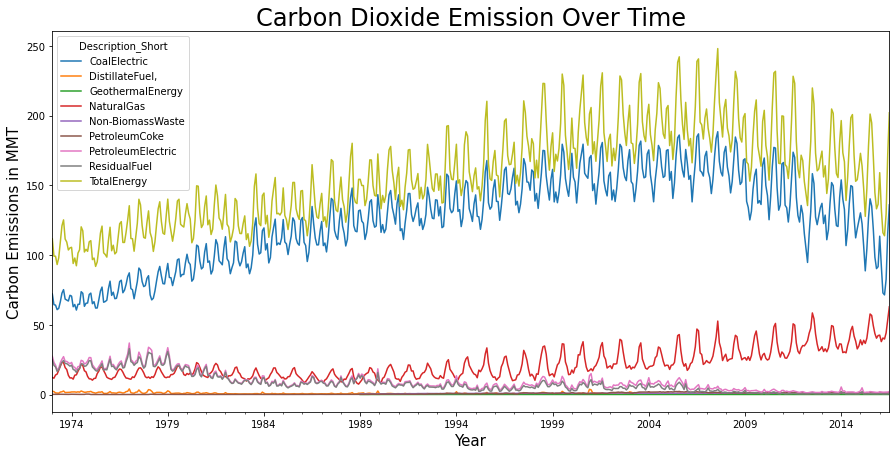

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
ts.groupby(['YYYYMM','Description_Short']).sum()['Value'].unstack().plot(ax=ax)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Carbon Emissions in MMT', fontsize=15)
ax.set_title('Carbon Dioxide Emission Over Time', fontsize=24)

**Observations and Insights:**
1. We can see that total emission peaked around 2006 and started to decline.
2. Because majority of emission is from coal, the trend of total emission is not affected by any other source. 
3. Natural gas emission is starting to increase and may start to dominate, i.e. play a bigger role than coal, at a later stage. 

#### **Visualize the trend of CO2 emission from each energy source individually**

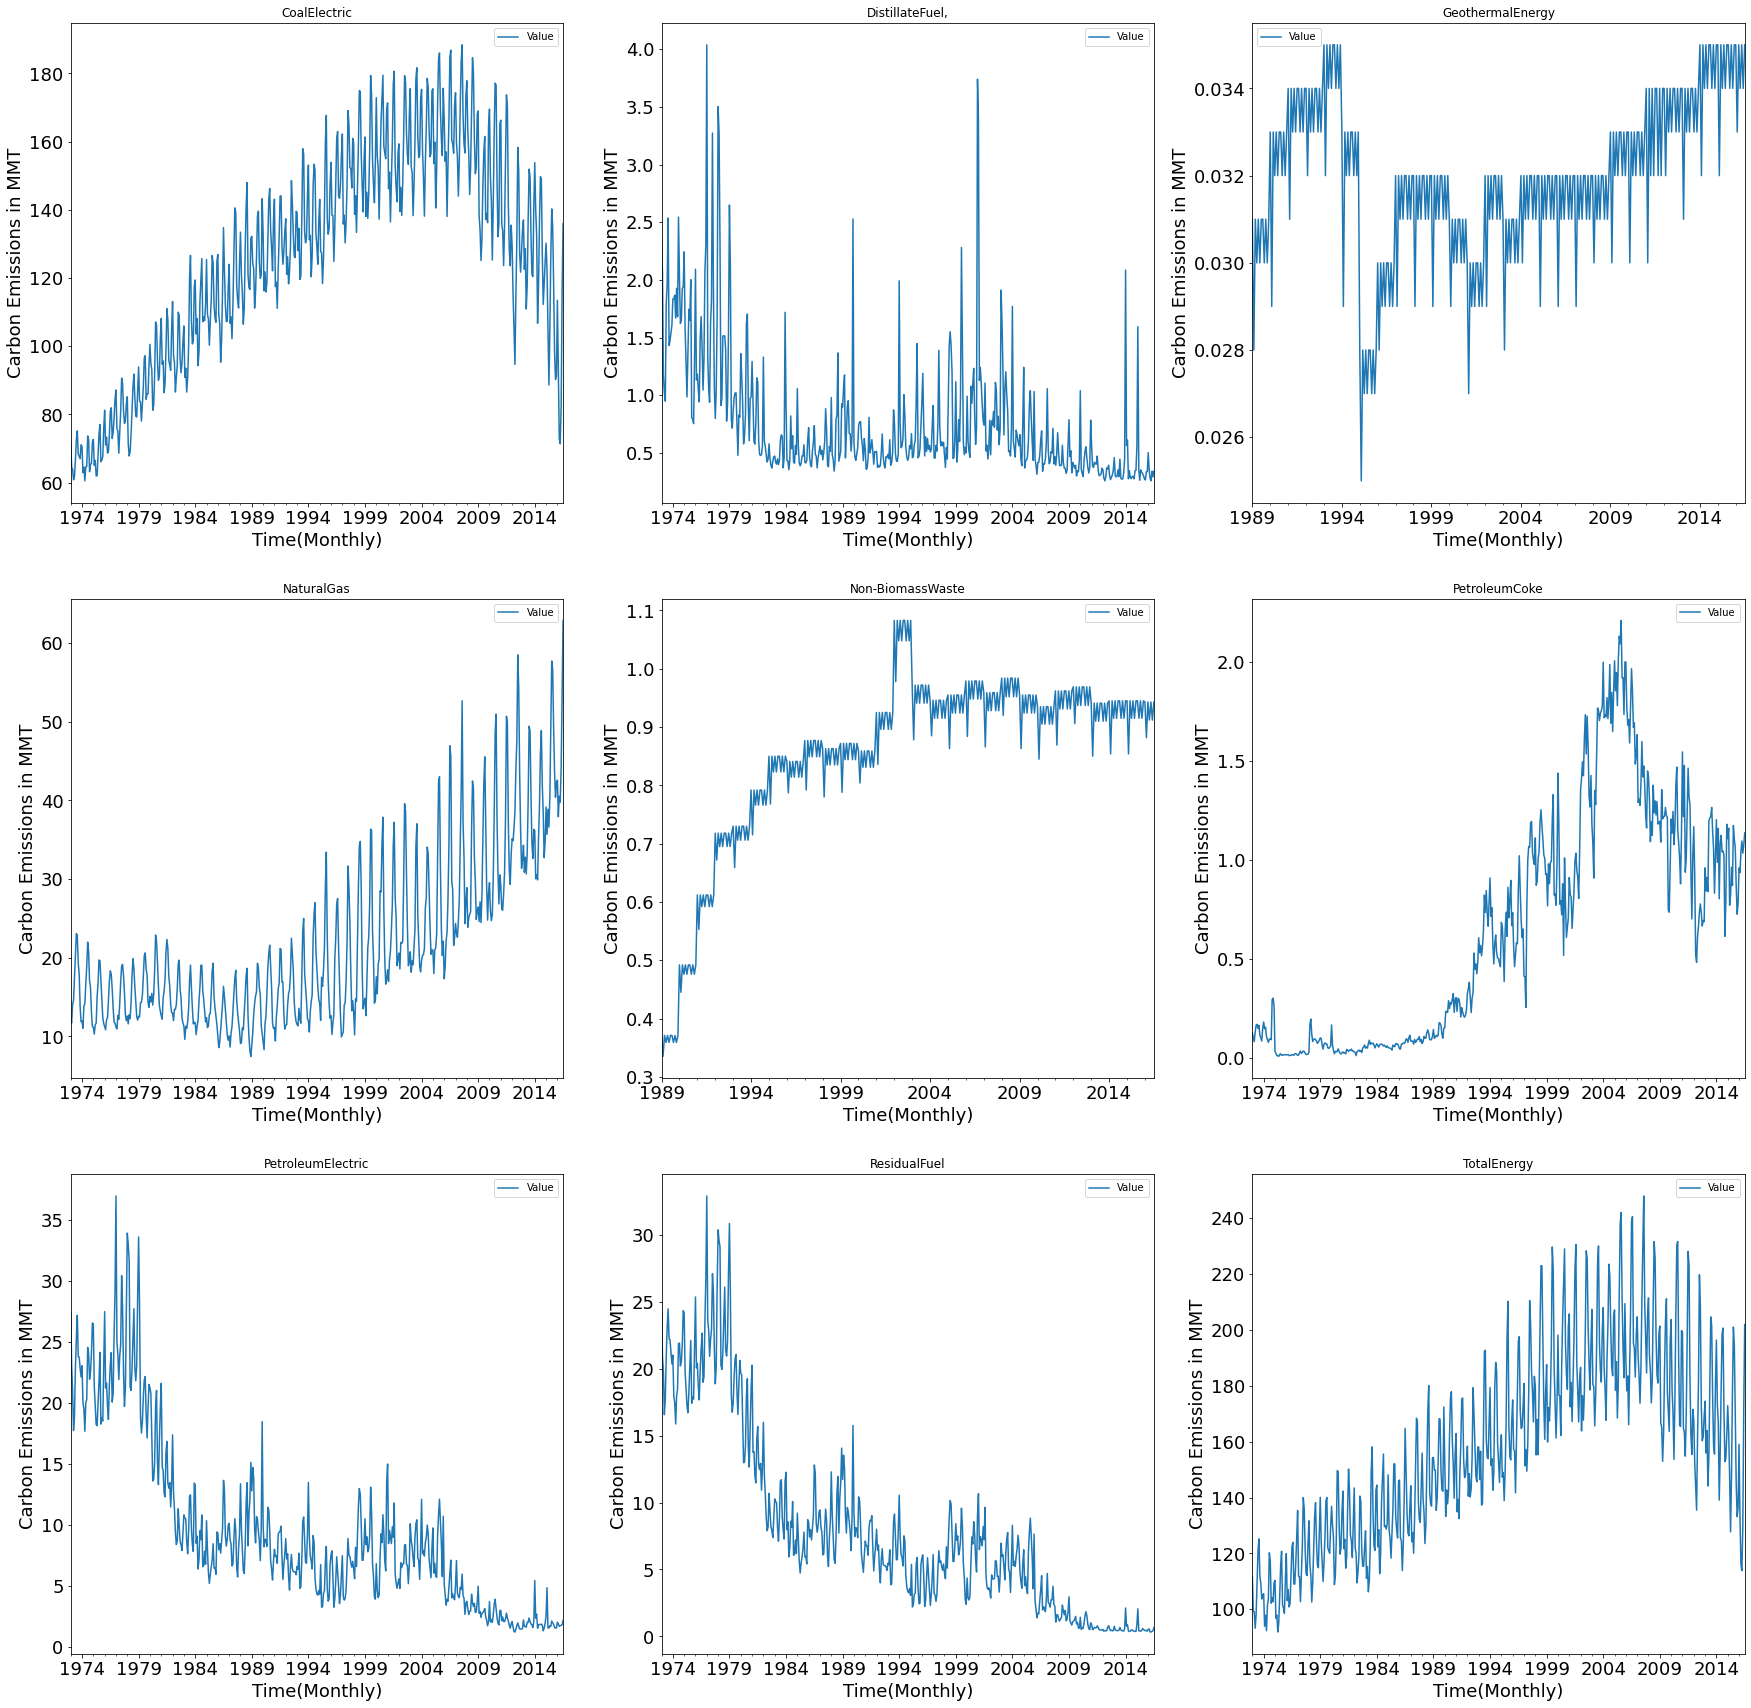

In [15]:
fig, axes = plt.subplots(3,3, figsize = (30,30))
for (desc, group), ax in zip(ts_per_source, axes.flatten()):
    group.plot(y='Value',ax = ax, title=desc, fontsize = 18)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

#### Observations and Insights: 
1. Highest emission is by coal followed by natural gas. 
2. For natural gas the following trend is observed:
2.1 From 1973 to about 1995, the trend is flat. 
2.2 From 1995 to 2016 the trend is increasing somewhat linearly
3. Highest emission is by coal and it peaks around 2005. 
4. Petroleum and Residual Fuel trend is very similar. It appears to to follow decay trend. 
5. Non-bio waste appears to plateau after 2004
6. Other energy source carbon dioxide emission is more random. 

#### Bar chart of CO2 Emissions per energy source

In [16]:
CO2_per_source = ts_per_source['Value'].sum().sort_values()
CO2_per_source.head(9)

Description_Short
GeothermalEnergy        10.563
Non-BiomassWaste       281.367
PetroleumCoke          338.785
DistillateFuel,        404.887
ResidualFuel          4239.312
PetroleumElectric     4982.993
NaturalGas           11295.359
CoalElectric         65782.393
TotalEnergy          82352.676
Name: Value, dtype: float64

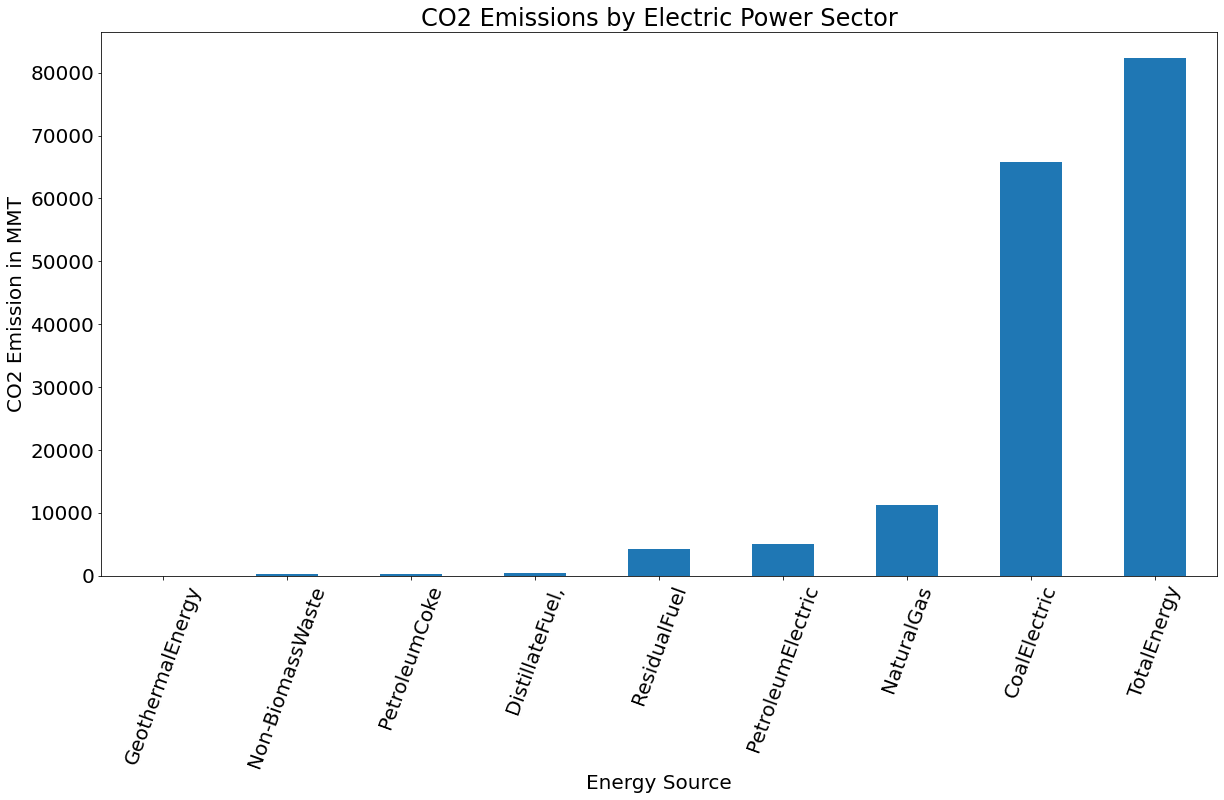

In [17]:
# this is an alternative simplier method to plot bar plot compared to above method
CO2_per_source.plot(kind='bar', figsize = (20,10))
plt.xlabel('Energy Source', fontsize = 20)
plt.ylabel('CO2 Emission in MMT', fontsize = 20)
plt.xticks(rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('CO2 Emissions by Electric Power Sector', fontsize=24)
plt.show()

#### Developing the time series model and forcasting by using the natural gas CO2 emission from the electirical power generation.
1. Only natural gas is that is increasing. 
2. Other energy source is either plateauing or decreasing.
3. Only natural gas appears to be increasing linearly. 


In [18]:
emission = ts.iloc[:,1:]   # Monthly total emissions (mte)
emission = emission.groupby(['Description', pd.Grouper(freq="M")])['Value'].sum().unstack(level = 0)
ts_mte = emission[['Natural Gas Electric Power Sector CO2 Emissions']].rename(columns={'Natural Gas Electric Power Sector CO2 Emissions': 'Value'}) # monthly total emissions (mte)
ts_mte.head()

Description,Value
YYYYMM,
1973-01-31,12.175
1973-02-28,11.708
1973-03-31,13.994
1973-04-30,14.627
1973-05-31,17.344


### **Split the dataset for natural gas in train and test for machine learning.**

In [19]:
# Split the data into train and test
# We'll consider the data from the **last 12 months as the test data** and the remaining data as the train data.
ts_train, ts_test = ts_mte.iloc[:-12], ts_mte.iloc[-12:]
print(ts_train)
print(ts_test)

Description   Value
YYYYMM             
1973-01-31   12.175
1973-02-28   11.708
1973-03-31   13.994
1973-04-30   14.627
1973-05-31   17.344
...             ...
2015-03-31   38.872
2015-04-30   36.610
2015-05-31   40.440
2015-06-30   48.920
2015-07-31   57.712

[511 rows x 1 columns]
Description   Value
YYYYMM             
2015-08-31   56.662
2015-09-30   49.384
2015-10-31   43.680
2015-11-30   40.394
2015-12-31   42.270
2016-01-31   42.566
2016-02-29   37.918
2016-03-31   40.525
2016-04-30   39.763
2016-05-31   44.210
2016-06-30   53.567
2016-07-31   62.881


### **Test of Stationarity**
1. Testing stationarity is important because for a time series analysis to be performed on a dataset, it should be stationary.
2. Stationarity is a characteristic property of having constant statistical measures such as mean, variance, co-variance etc over a period of time.
3. A time series is said to be stationary if the marginal distribution of y at a time p(yt) is the same at any other point in time. 
4. We can check the stationarity:
4.1 By visualizing the rolling mean and standard deviation of the series
4.2 By using the Augmented Dickey-Fuller test

In [20]:
#Import the required package

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

### **Testing the stationarity through visualization**

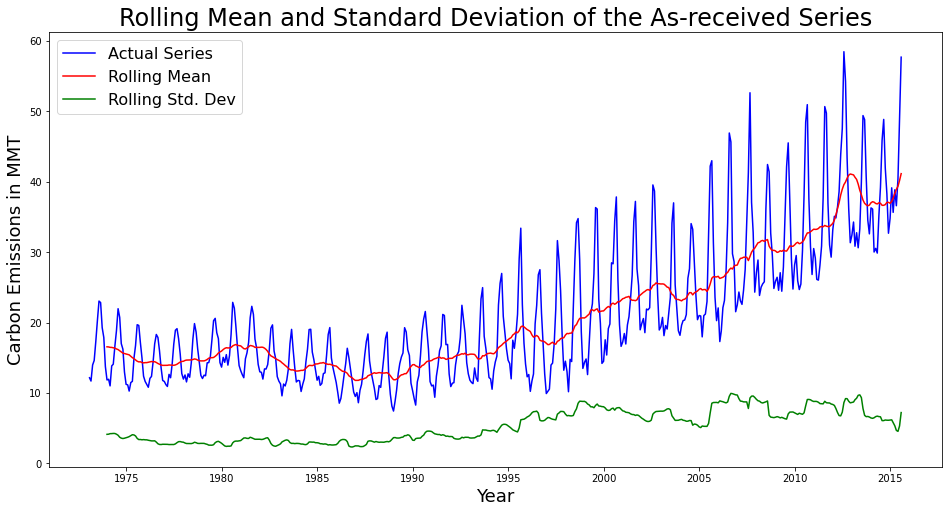

In [21]:
# Calculate the rolling mean and standard deviation for a window of 12 observations
rolmean = ts_train.rolling(window=12).mean() #Calculates mean of consecutive 12 averages and keeps on moving. Its like MA with 12 reading. 
rolstd = ts_train.rolling(window=12).std()

# Visualize the rolling mean and standard deviation
plt.figure(figsize=(16,8))
actual = plt.plot(ts_train, color = 'b', label = 'Actual Series')
rollingmean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
rollingstd = plt.plot(rolstd, color = 'green', label = 'Rolling Std. Dev')
plt.title('Rolling Mean and Standard Deviation of the As-received Series', fontsize=24)
plt.ylabel('Carbon Emissions in MMT', fontsize = 18)
plt.xlabel('Year', fontsize = 18)
plt.legend(fontsize=16)
plt.show()

####  Observations and Insights: 
1. Visual analysis shows that the data shows that it has two segment.
2. From 1973 to 1997 it is flat and not increasing with time.
3. From 1997 to 2015, it is increasing linearly with time. 
4. Thus, the trend is not stationary.
5. The non-stationary component is also displayed by the rolling mean. The rolling mean is going up so it is not stationary.  

### **Test the stationarity using the Augmented Dickey-Fuller Test**

### Using the **Augmented Dickey-Fuller (ADF) Test** to verify if the series is stationary or not. 

The null and alternate hypotheses for the ADF Test are defined as:

**- Null hypothesis:** The Time Series is non-stationary


**- Alternative hypothesis:** The Time Series is stationary

In [22]:
#Define a function to use adfuller test
def adfuller(dataset):
 #Importing adfuller using statsmodels
  from statsmodels.tsa.stattools import adfuller
  print('Dickey-Fuller Test: ')
  adftest = adfuller(dataset['Value'])
  adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Observations'])
  for key,value in adftest[4].items():
    adfoutput['Critical Value (%s)'%key] = value
  print(adfoutput)
adfuller(ts_train)

Dickey-Fuller Test: 
Test Statistic            1.459996
p-value                   0.997370
Lags Used                19.000000
No. of Observations     491.000000
Critical Value (1%)      -3.443739
Critical Value (5%)      -2.867444
Critical Value (10%)     -2.569915
dtype: float64


### Observations and Insights:
1. The p-value is equal to 0.997. For a 95% confidence level, the p-value has to be less than 0.05 to be significant to reject the null hypothesis. This indicates that we fail to reject the null-hypothesis. The time series is not stationary. 
2. We need to transform teh dataset into a stationary one in order to perform time series analysis. 

**The following two methods are used to convert a non-stationary series into a stationary one:**

1. Log Transformation
2. Differencing the series (lagged series)

We take the average of ‘k’ consecutive values depending on the frequency of time series (in this project 12 months). 

Here, we will take the average over the past 1 year.

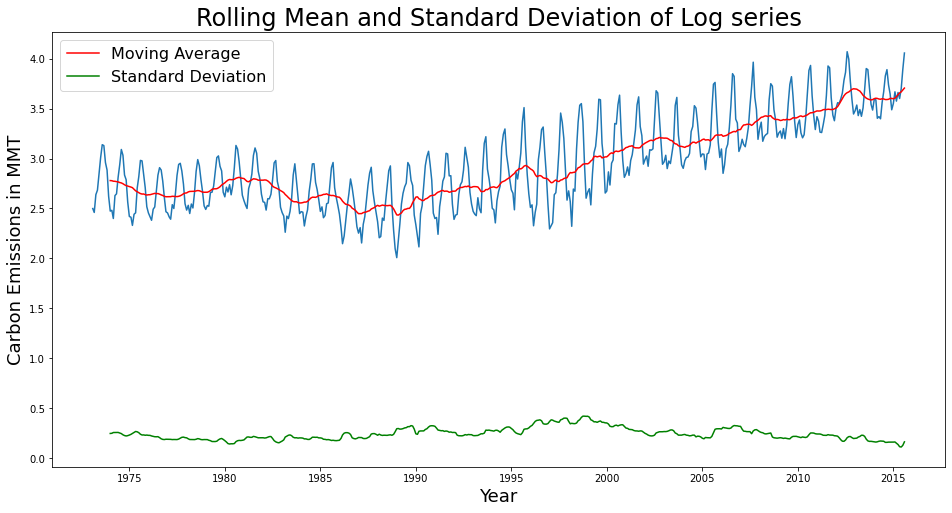

In [23]:
 # Visualize the rolling mean and standard deviation after using log transformation
plt.figure(figsize=(16,8))
ts_log = np.log(ts_train)
MAvg = ts_log.rolling(window=12).mean()
MStd = ts_log.rolling(window=12).std()
plt.title('Rolling Mean and Standard Deviation of Log series', fontsize=24)
plt.plot(ts_log)
plt.plot(MAvg, color='r', label = 'Moving Average')
plt.plot(MStd, color='g', label = 'Standard Deviation')
plt.ylabel('Carbon Emissions in MMT', fontsize = 18)
plt.xlabel('Year', fontsize = 18)
plt.legend(fontsize=16)
plt.show()

In [24]:
adfuller(ts_log)

Dickey-Fuller Test: 
Test Statistic            0.435342
p-value                   0.982770
Lags Used                19.000000
No. of Observations     491.000000
Critical Value (1%)      -3.443739
Critical Value (5%)      -2.867444
Critical Value (10%)     -2.569915
dtype: float64


### Observations and Insights: 
1. The p-value is equal to 0.98. For a 95% confidence level, the p-value has to be less than 0.05 to be significant to reject the null hypothesis. 
2. We fail to reject the null hypothesis.
3. The moving average in the graphs is increasing. This indicates the trend is not stationary. 

### Visualize the rolling mean and rolling standard deviation of the shifted series (df_shift) and check the stationarity by calling the adfuller() function. 

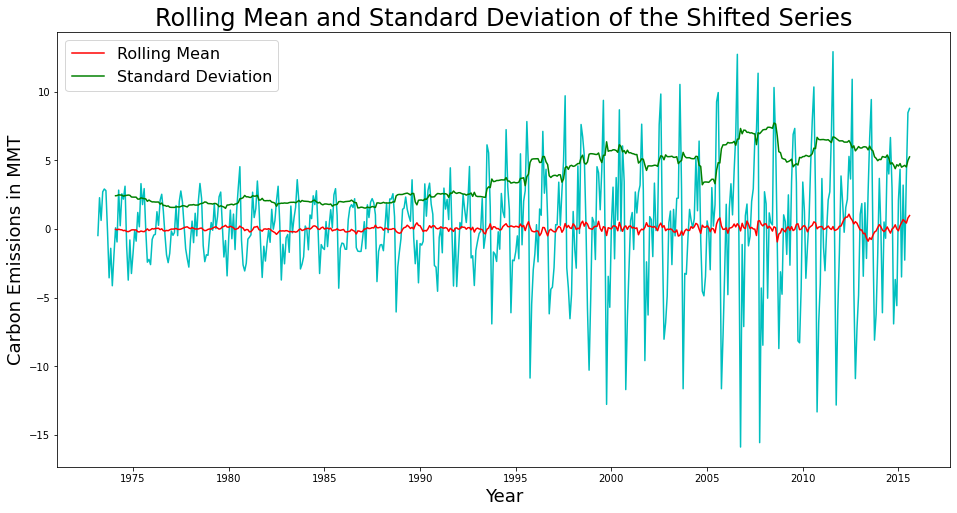

In [25]:
plt.figure(figsize=(16,8))
df_shift = ts_train - ts_train.shift(periods = 1) #period = 1 means differencing = 1. difference(t) = observation(t)-observation(t-1)
MAvg_shift = df_shift.rolling(window=12).mean()
MStd_shift = df_shift.rolling(window=12).std()
plt.title('Rolling Mean and Standard Deviation of the Shifted Series', fontsize=24)
plt.plot(df_shift, color='c')
plt.plot(MAvg_shift, color='red', label = 'Rolling Mean')
plt.plot(MStd_shift, color='green', label = 'Standard Deviation')
plt.ylabel('Carbon Emissions in MMT', fontsize = 18)
plt.xlabel('Year', fontsize = 18)
plt.legend(fontsize=16)
plt.show()

#Dropping the null values that we get after applying differencing method for using Augmented Dickey-Fuller (ADF) Test
df_shift = df_shift.dropna()

### Observations and Insights: 
1. The graph shows that the rolling mean is flat indicating the trend is stationary. 
2. The differencing value 'd' has not been optimized. 

In [26]:
adfuller(df_shift) #df_shift is for rolling mean

Dickey-Fuller Test: 
Test Statistic           -5.343670
p-value                   0.000004
Lags Used                18.000000
No. of Observations     491.000000
Critical Value (1%)      -3.443739
Critical Value (5%)      -2.867444
Critical Value (10%)     -2.569915
dtype: float64


### Observations and Insights: 
1. The p-value is equal to 0.000004. For a 95% confidence interval level, the p-value has to be less than 0.05 to accept the alternative hypothesis. 
2. Differencing series (lagged) method the trend is stationary.

### **Elimination of trend and seasonality: Decomposition**

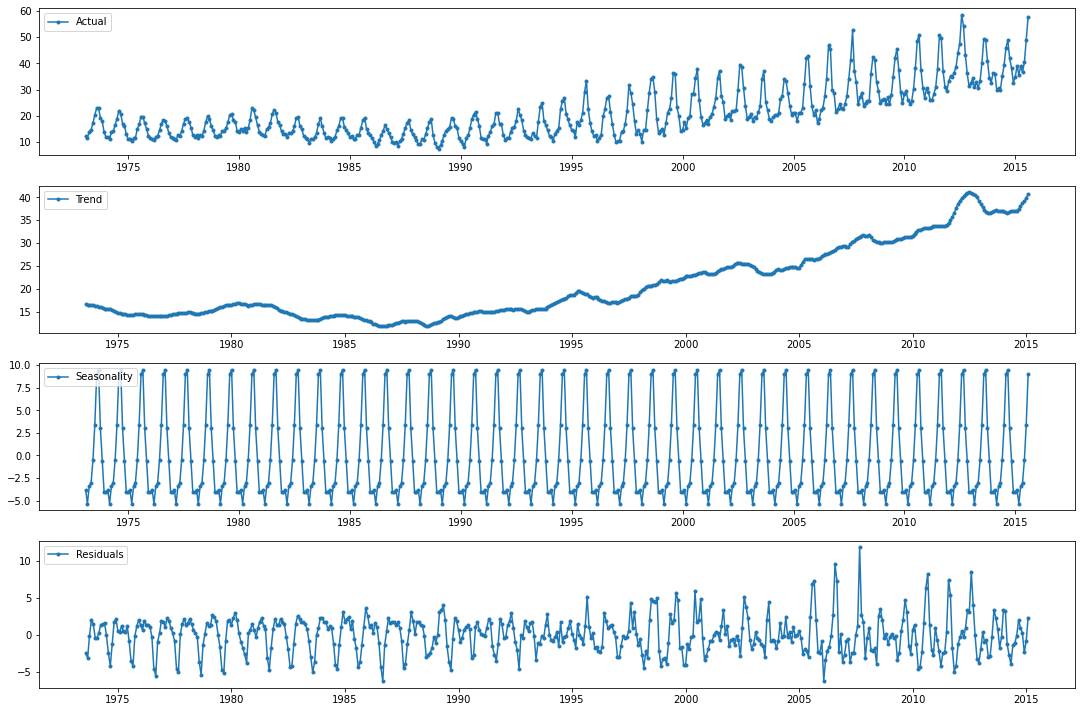

In [27]:
#Importing the seasonal_decompose function to decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ts_train)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(ts_train, label='Actual', marker='.')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', marker='.')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', marker='.')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', marker='.')
plt.legend(loc='upper left')
plt.tight_layout()

**Observations and Insights:** There is seasonality, which has been removed. 

### Plotting the auto-correlation function and partial auto-correlation function to obtain the optimal p and q parameters to build the  AR, MA, ARMA, and ARIMA models.

**Plot the ACF and PACF charts and find the optimal parameters**

1. Autocorrelation function (ACF): ACF explains how the present value of a given time series is correlated with the past values.The ACF plots the correlation coefficient against the lag, which is measured in terms of a number of periods or units. A lag corresponds to a certain point in time after which we observe the first value in the time series.

2. Partial autocorrelation function (PACF): PACF explains partial correlation between the series and lags of itself. PACF can be explained using a linear regression where we predict y(t) from y(t-1), y(t-2), and y(t-3). In PACF, we correlate the “parts” of y(t) and y(t-3) that are not predicted by y(t-1) and y(t-2).

3. The ACF and PACF plots should be considered together to define the process. 
- AR process: The ACF plot will gradually decrease and simultaneously the PACF should have a sharp drop after p significant lags. 
- MA process: The ACF should show a sharp drop after a certain q number of lags while PACF should show a geometric or gradual decreasing trend. 
- ARMA: If both ACF and PACF plots demonstrate a gradual decreasing pattern, then the ARMA process should be considered for modeling.

<Figure size 1152x576 with 0 Axes>

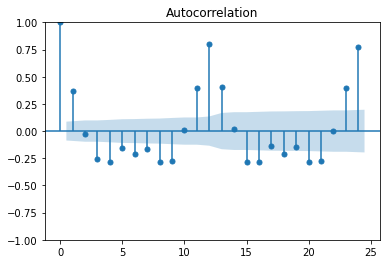

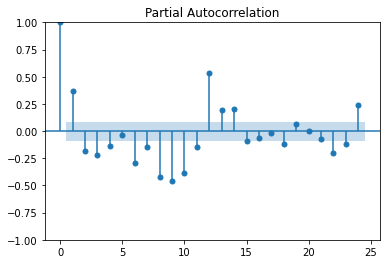

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plt.figure(figsize = (16,8))
plot_acf(df_shift, lags = 24) 
plt.show() 
plot_pacf(df_shift, lags = 24) 
plt.show()

### Observations and Insights:
1. From the above PACF plot we can see that the first 4 lags extends beyond the statistically significant boundary. This indicates that an AR Model of lag 4 (p=4) should be sufficient to fit the data. The general equation will be: T(i) = B0 + B1*T(i-1) + B2*T(i-2) + B3*T(i-3) + B4*T(i-4) + error. This equation is used for autoregressive
2. Similarly, from the ACF plot, we can infer that there is only 1 lag point at which the plot extends beyond the statistically significant boundary, thus q=1. q is the order of moving average. Order q of the MA process is obtained from the ACF plot, this is the lag after which ACF crosses the upper confidence interval for the first time. X(t) = B0*W(t) +/- B1*W(t-1) +/- ... where W is white noise. This equation is used for moving average

#### NOTES ON MOVING AVERAGE
- Moving average process is an autoregression model of the time series of residual errors from prior predictions. Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts.

- We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By definition, this is how the process was generated.

- For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing off of correlation from the lag onwards.

# **AR Model**
Order p is the lag value after which the PACF plot crosses the upper confidence interval for the first time. These p lags will act as our features while forecasting the AR time series.

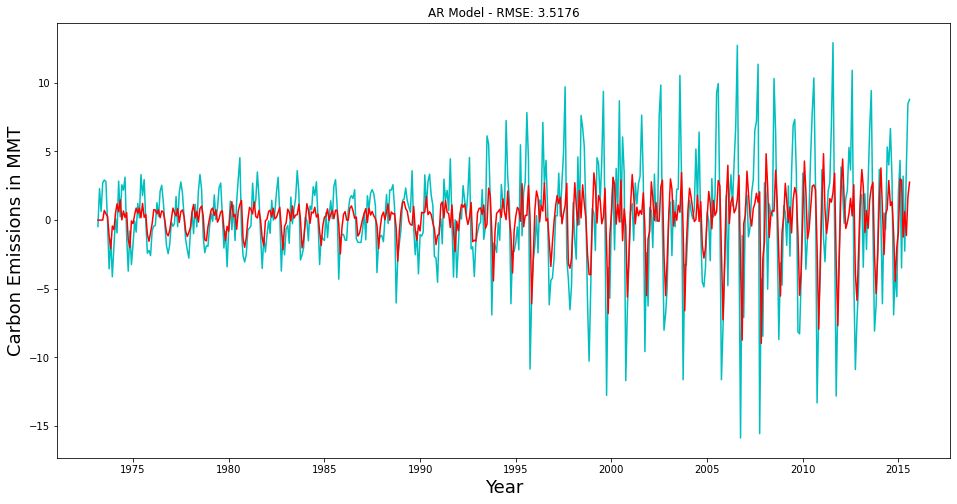

In [29]:
#Importing AutoReg function to apply AR model
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(16,8))
model_AR = AutoReg(df_shift, lags=4) #Use number of lags (p) as 4 and apply AutoReg function on df_shift series
results_AR = model_AR.fit() #fit the model
plt.plot(df_shift, color='c')
predict = results_AR.predict(start=0, end=len(df_shift)-1) #predict the series 
predict = predict.fillna(0) #Converting NaN values to 0
plt.plot(predict, color='red')
plt.title('AR Model - RMSE: %.4f'% mean_squared_error(predict,df_shift['Value'], squared=False))  #Calculating rmse
plt.ylabel('Carbon Emissions in MMT', fontsize = 18)
plt.xlabel('Year', fontsize = 18)
plt.show()

In [30]:
results_AR.aic 
# Note: The Akaike Information Critera (AIC) is a widely used measure of a statistical model. 
# It basically quantifies:
# 1) the goodness of fit
# 2) the simplicity/parsimony, of the model into a single statistic.
# When comparing two models, the one with the lower AIC is generally “better”. 

2723.769651234004

### Observations & Insights:
1. The number of lag used was 4 based on PACF graph. 
2. The AR model show that the trend (red line) corresponds somewhat with the actual data, i.e., the line moves up and down in similar fashion to actual data. However, it does not prefectly overlap. 
3. The RMSE = 3.5176. Need to compare this value with other model. The model that generates the lowest RMSE is the best model. 

# **MA Model**
Order q is the lag value after which the ACF plot crosses the upper confidence interval for the first time. These q lags will act as our features while forecasting the MA time series along with p from PACF. 

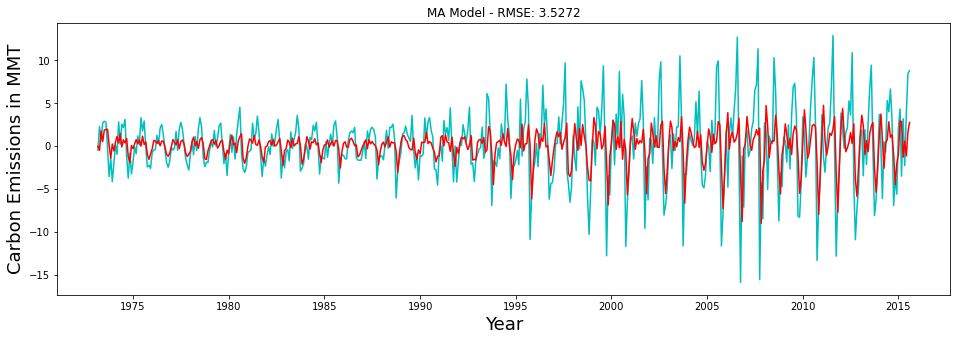

In [31]:
plt.figure(figsize=(16,5))
model_MA = ARIMA(df_shift, order=(4, 1, 1)) #Using p4, d=1, q=1
results_MA = model_MA.fit()
plt.plot(df_shift, color = 'c')
plt.plot(results_MA.fittedvalues, color='red')
plt.title('MA Model - RMSE: %.4f'% mean_squared_error(results_MA.fittedvalues, df_shift['Value'], squared=False))
plt.ylabel('Carbon Emissions in MMT', fontsize = 18)
plt.xlabel('Year', fontsize = 18)
plt.show()

In [32]:
results_MA.aic

2744.540034436287

### Observations & Insights:
1. The number of lag 'q' used was 1 based on ACF graph.
2. Based on PACF, p=4. 
3. Differencing was 1. 
4. The MA model show that the trend (red line) corresponds somewhat with the actual data, i.e., the line moves up and down in similar fashion to actual data. However, it does not prefectly overlap. 
5. The RMSE = 3.5272. This is slightly greater than that of AR. This indicates that the AR model is slightly better than the MA model. 
6. The AIC is also slightly greater than that of AR, which matches RMSE.

## ARMA MODEL

**We will be using the above AR lag(P) & MA lag(Q) as a paramter** and d=0 in ARIMA so that it will work as an ARMA model.

Fit and predict the shifted series with the ARMA Model and calculate the RMSE. Also, visualize the time series and write your observations.

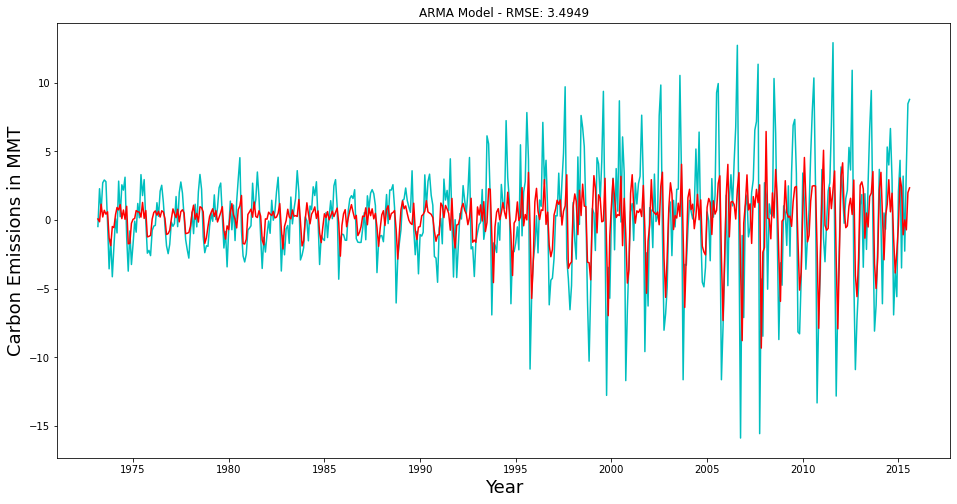

In [33]:
plt.figure(figsize=(16,8))
model_ARMA = ARIMA(df_shift, order=(4, 0, 1)) #Using p=4, d=0, q=1 and apply ARIMA function on df_shift series
results_ARMA = model_ARMA.fit() #fit the model
plt.plot(df_shift, color = 'c')
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('ARMA Model - RMSE: %.4f'% mean_squared_error(results_ARMA.fittedvalues,df_shift['Value'], squared=False))
plt.ylabel('Carbon Emissions in MMT', fontsize = 18)
plt.xlabel('Year', fontsize = 18)
plt.show()

In [34]:
#**Check the AIC value of the model**
results_ARMA.aic

2738.08228355997

### Observations & Insights:
1. The number of lag 'q' used was 1 based on ACF graph.
2. Based on PACF, p=4. 
3. Differencing was set to 0 to make it ARMA. If d was greater than 0, it will be ARIMA ('I') stands for integrated for random walk.  
4. The ARMA model show that the trend (red line) corresponds somewhat with the actual data, i.e., the line moves up and down in similar fashion to actual data. However, it does not prefectly overlap. 
5. The RMSE = 3.4949. This is slightly less than AR (3.5176) so it is a better fit than the AR model.
6. The AIC is also slightly less than that of AR, which matches RMSE.

# ARIMA MODEL
We can split the Arima term into three terms, AR, I, MA:

AR(p) stands for autoregressive model, the p parameter is an integer that confirms how many lagged series are going to be used to forecast periods ahead, example:


The formula for the AR(p) model is:  y^t=μ+θ1Yt−1+...+θpYt−p  Where  μ  is the constant term, the p is the periods to be used in the regression and  θ  is the parameter fitted to the data.

I(d) is the differencing part, the d parameter tells how many differencing orders are going to be used, it tries to make the series stationary, example:

Yesterday I sold 10 items of a product, today I sold 14, the "I" in this case is just the first difference, which is +4, if using logarithm base this difference is equivalent to percentual difference.
If d = 1:  y(t)=Y(t)−Y(t−1)  where  y(t)  is the differenced series and  Y(t−period)  is the original series
If d = 2:  y(t)=(Y(t)−Y(t−1))−(Y(t−1)−Y(t−2))=Y(t)−2Y(t−1)+Y(t−2) 
Note that the second difference is a change-in-change, which is a measure of the local "acceleration" rather than trend.

MA(q) stands for moving average model, the q is the number of lagged forecast errors terms in the prediction equation, example:
It's strange, but this MA term takes a percentage of the errors between the predicted value against the real. It assumes that the past errors are going to be similar in future events.
The formula for the MA(p) model is:  y^t=μ−Θ1et−1+...+Θqet−q  Where  μ  is the constant term, q is the period to be used on the  e  term and  Θ  is the parameter fitted to the errors
The error equation is  e(t)=Y(t−1)−y^(t−1) 

**Fit and predict the shifted series with the ARIMA Model and calculate the RMSE. Also, visualize the time series and write your observations.**

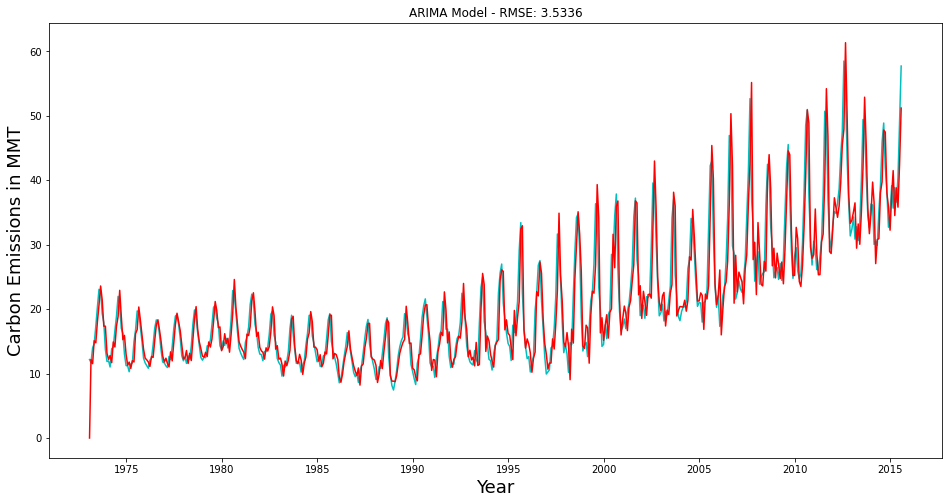

In [35]:
plt.figure(figsize=(16,8))
model_ARIMA = ARIMA(ts_train, order=(4, 1, 1)) #Using p=4, d=1, q=1 and apply ARIMA function on df_log series
results_ARIMA = model_ARIMA.fit() #fit the model
plt.plot(ts_train, color = 'c')
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('ARIMA Model - RMSE: %.4f'% mean_squared_error(results_ARIMA.fittedvalues,ts_train['Value'], squared=False))
plt.ylabel('Carbon Emissions in MMT', fontsize = 18)
plt.xlabel('Year', fontsize = 18)
plt.show()

**Check the AIC value of the model**

In [36]:
results_ARIMA.aic

2736.338683365918

### Observations & Insights:
1. The number of lag 'q' used was 1 based on ACF graph.
2. Based on PACF, p=4. 
3. Differencing was set to 1 to make it ARIMA.   
4. The ARIMA model show that the trend (red line) corresponds with the actual data very nicely, i.e., the model overlaps with the actual data nicely. 
5. The RMSE = 3.5336. This is slightly higher than AR (3.5176)
6. The AIC is also slightly higher than that of AR (2723), which matches RMSE.

In [37]:
# Printing the fitted values from arima
predictions=pd.Series(results_ARIMA.fittedvalues)
predictions

YYYYMM
1973-01-31     0.000000
1973-02-28    12.175073
1973-03-31    11.533671
1973-04-30    15.094344
1973-05-31    14.779442
                ...    
2015-03-31    34.517436
2015-04-30    38.808392
2015-05-31    35.819006
2015-06-30    42.364381
2015-07-31    51.193386
Freq: M, Length: 511, dtype: float64

# Inverse Transformation

**Apply an inverse transformation on the ARIMA model**

In [38]:
#Add the code blocks based on the requirements
predictions_ARIMA = predictions.copy()
predictions_ARIMA

YYYYMM
1973-01-31     0.000000
1973-02-28    12.175073
1973-03-31    11.533671
1973-04-30    15.094344
1973-05-31    14.779442
                ...    
2015-03-31    34.517436
2015-04-30    38.808392
2015-05-31    35.819006
2015-06-30    42.364381
2015-07-31    51.193386
Freq: M, Length: 511, dtype: float64

**Plot the original vs predicted series**

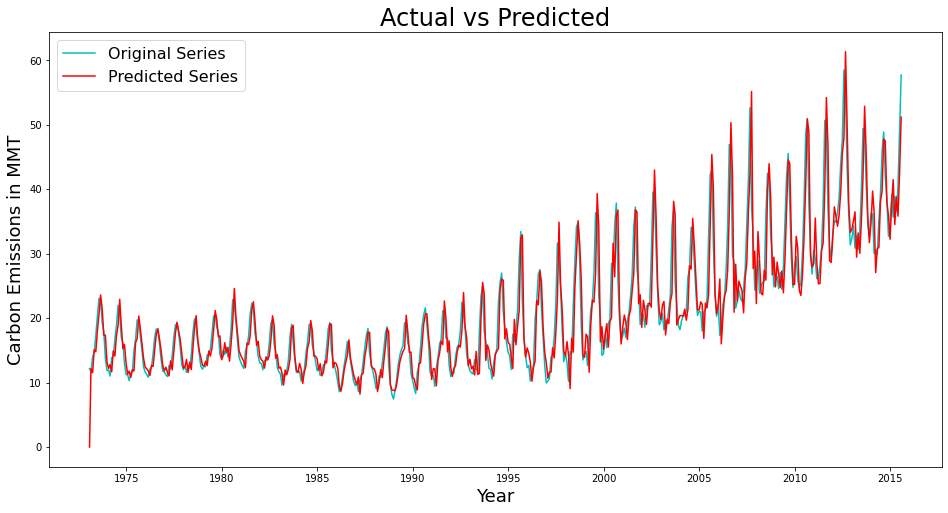

In [39]:
plt.figure(figsize=(16,8))
plt.plot(ts_train, color = 'c', label = 'Original Series')  #plot the original train series
plt.plot(predictions_ARIMA, color = 'r', label = 'Predicted Series')  #plot the predictions_ARIMA 
plt.title('Actual vs Predicted', fontsize = 24)
plt.ylabel('Carbon Emissions in MMT', fontsize = 18)
plt.xlabel('Year', fontsize = 18)
plt.legend(fontsize=16)
plt.show()

### Forecasting the values for next 12 months and comparing it with test data

In [40]:
#Add the code blocks based on the requirements
forecasted_ARIMA = results_ARIMA.forecast(steps=12) 
forecasted_ARIMA

2015-08-31    60.734583
2015-09-30    58.350434
2015-10-31    55.132275
2015-11-30    52.507458
2015-12-31    52.390959
2016-01-31    53.395512
2016-02-29    54.588380
2016-03-31    55.182637
2016-04-30    55.019517
2016-05-31    54.609755
2016-06-30    54.230050
2016-07-31    54.138107
Freq: M, Name: predicted_mean, dtype: float64

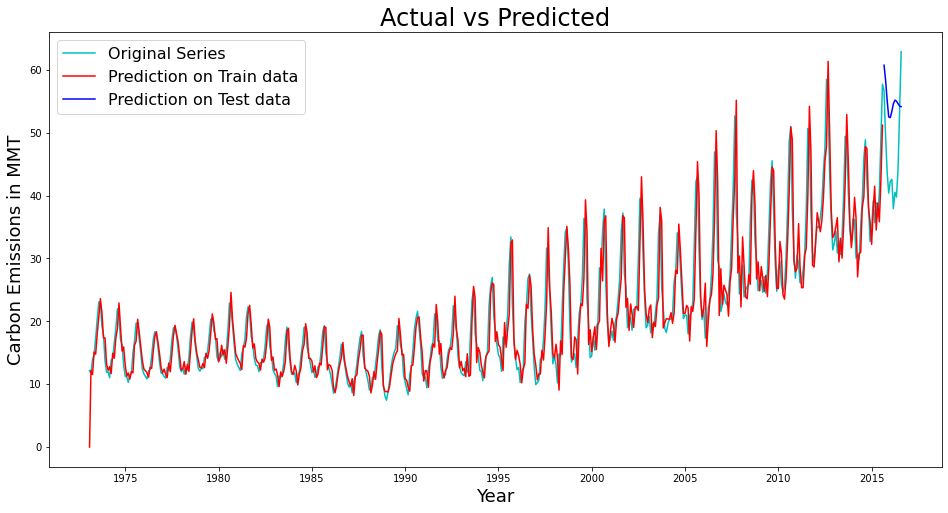

In [41]:
plt.figure(figsize=(16,8))
plt.plot(ts_mte, color = 'c', label = 'Original Series')
plt.plot(predictions_ARIMA, color = 'r', label = 'Prediction on Train data')
plt.plot(forecasted_ARIMA, label = 'Prediction on Test data', color='b')
plt.title('Actual vs Predicted', fontsize = 24)
plt.ylabel('Carbon Emissions in MMT', fontsize = 18)
plt.xlabel('Year', fontsize = 18)
plt.legend(fontsize=16)
plt.show()

### Observation and Insight:
1. The forecasted ARIMA does not predict the acutal values nicely. Thus, ARIMA is not appropriate for this project. 
2. The poor forecast could be due to seasonality factor that ARIMA does not consider. 

### Comparing the RMSE on the original train and test data.

In [42]:
error_predictions_ARIMA = mean_squared_error(predictions_ARIMA, ts_train, squared = False) #calculate RMSE using the predictions_ARIMA and df_train 
error_predictions_ARIMA

3.533639396290713

In [43]:
error_forecasted_ARIMA = mean_squared_error(forecasted_ARIMA.iloc[:12,], ts_test, squared = False) #calculate RMSE using the predictions_ARIMA and df_train 
error_forecasted_ARIMA

11.199432211049317

### Observation and Insight:
1. The MSE of the prediction is low
2. The MSE of forecast is much higher than that of prediction. Thus, the forecast fit is not good. 

# SARIMA MODEL
Seasional autoregressive integrated moving average model. The dataset has seasional component so SARIMA model should provide a better prediction. ARIMA is for forecasing univariate time series data. ARIMA does not take into account the seasionality aspect of the data. 
- [A Gentle Introduction to SARIMA for Time Series Forecasting in Python](https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/)
- [Forecasting with Seasonal ARIMA in Python](https://www.datasciencecentral.com/profiles/blogs/tutorial-forecasting-with-seasonal-arima)

### NOTES ON SARIMA:

#### The p, d, q parameters are capitalized to differ from the non seasonal parameters.

##### SAR(P) is the seasonal autoregression of the series.

- The formula for the SAR(P) model is:  y^t=μ+θ1Yt−s  Where P is quantity of autoregression terms to be added, usually no more than 1 term, s is how many periods ago to be used as base and  θ  is the parameter fitted to the data.

- Usually when the subject is weather forecasting, 12 months ago have some information to contribute to the current period.
- Setting P=1 (i.e., SAR(1)) adds a multiple of Y(t−s) to the forecast for y(t) 

##### I(D) the seasonal difference MUST be used when you have an strong and stable pattern.

- If d = 0 and D = 1:  y(t)=Y(t)−Y(t−s)  where y(t)  is the differenced series and  Y(t−s)  is the original seasonal lag.
- If d =1 and D = 1:  y(t)=(Y(t)−Y(t−1))−(Y(t−s)−Y(t−s−1))=Y(t)−Y(t−1)−Y(t−s)+Y(t−s−1) 
- D should never be more than 1, and d+D should never be more than 2. Also, if d+D =2, the constant term should be suppressed.

##### SMA(Q)

- Setting Q=1 (i.e., SMA(1)) adds a multiple of error  e(t−s)  to the forecast for  y(t) 

- S: It's the seasonal period to calculate the the P, D, Q terms. If there is a 52 week seasonal correlation this is the number to be used on the 'S' parameter

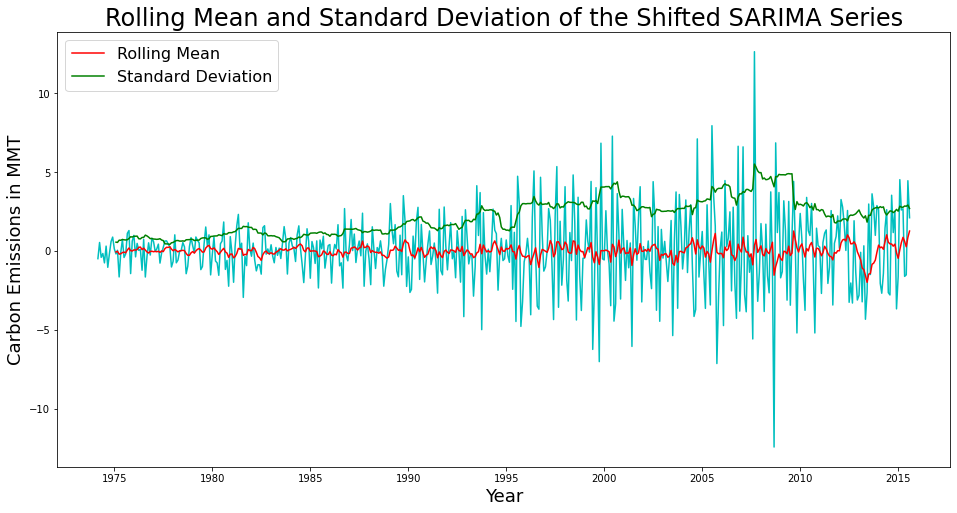

In [44]:
# Visualizing the rolling mean and standard deviation for SARIMA

#Differencing the series
plt.figure(figsize=(16,8))
df_seas = df_shift - df_shift.shift(periods = 12) # here period is 12 for seasonality. For ARIMA it was 1. 
MAvg_seas = df_seas.rolling(window=12).mean() #average of 12 consecutive readings
MStd_seas = df_seas.rolling(window=12).std()
plt.title('Rolling Mean and Standard Deviation of the Shifted SARIMA Series', fontsize=24)
plt.plot(df_seas, color='c')
plt.plot(MAvg_seas, color='red', label = 'Rolling Mean')
plt.plot(MStd_seas, color='green', label = 'Standard Deviation')
plt.ylabel('Carbon Emissions in MMT', fontsize = 18)
plt.xlabel('Year', fontsize = 18)
plt.legend(fontsize=16)
plt.show()
df_seas = df_seas.dropna()

### Observation and Insight: Visually the series appear stationary.

In [45]:
adfuller(df_seas) 

Dickey-Fuller Test: 
Test Statistic         -9.524433e+00
p-value                 3.004195e-16
Lags Used               1.200000e+01
No. of Observations     4.850000e+02
Critical Value (1%)    -3.443905e+00
Critical Value (5%)    -2.867518e+00
Critical Value (10%)   -2.569954e+00
dtype: float64


### Observation and Insight:
1. The p-value is equal to 3.004195e-16. For a 95% confidence level, the p-value has to be less than 0.05 to be significant to reject the null hypothesis. This indicates that we reject the null-hypothesis. The time series is stationary. 
2. The p-value is much less than the previous obtained p-value for shifted series using period = 1.

<Figure size 1152x576 with 0 Axes>

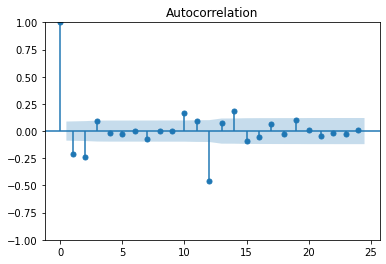

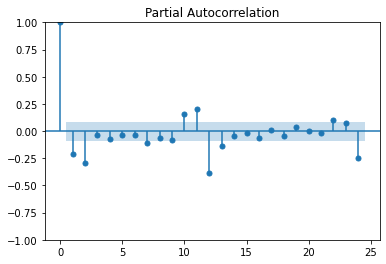

In [46]:
#Calculate the P and Q for SARIMA
plt.figure(figsize = (16,8))
plot_acf(df_seas, lags = 24) 
plt.show() 
plot_pacf(df_seas, lags = 24) 
plt.show()

### Observations and Insights:
1. From the above PACF plot we can see that the first two lags extends beyond the statistically significant boundary. Lagm (p) = 2. 
2. Similarly, from the ACF plot, we can infer that first two lag extends beyond the statistically significant boundary, whcih is q=2. 

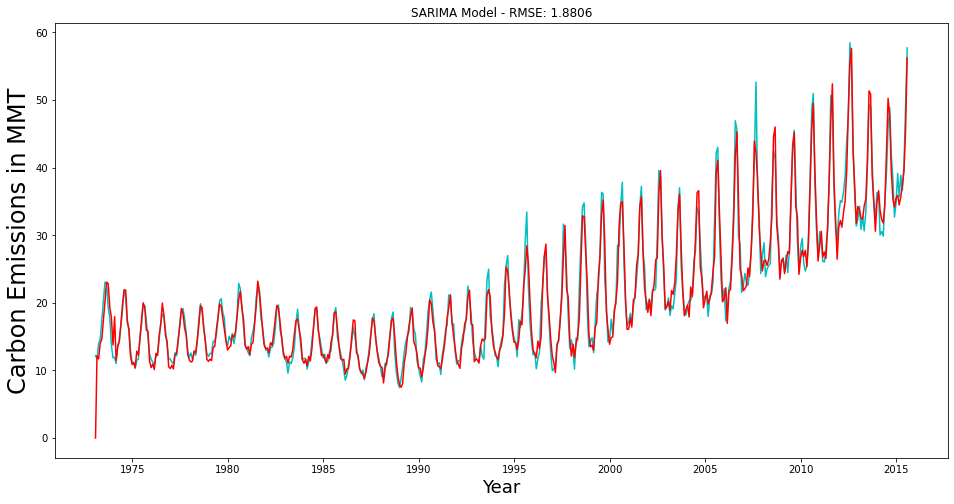

In [47]:
plt.figure(figsize=(16,8))
model_SARIMA = SARIMAX(ts_train, order=(4, 1, 1), seasonal_order=(2,1,2,12)) #Using P=4, D=1, Q=1 and apply ARIMA function on df_log series
results_SARIMA = model_SARIMA.fit() #fit the model
plt.plot(ts_train, color = 'c')
plt.plot(results_SARIMA.fittedvalues, color='red')
plt.title('SARIMA Model - RMSE: %.4f'% mean_squared_error(results_SARIMA.fittedvalues,ts_train['Value'], squared=False))
plt.ylabel('Carbon Emissions in MMT', fontsize = 24)
plt.xlabel('Year', fontsize = 18)
plt.show()

In [48]:
results_SARIMA.aic

2011.176347540873

In [49]:
spredictions=pd.Series(results_SARIMA.fittedvalues)
predictions_SARIMA = spredictions.copy()
predictions_SARIMA

YYYYMM
1973-01-31     0.000000
1973-02-28    12.174994
1973-03-31    11.707996
1973-04-30    13.993999
1973-05-31    14.626996
                ...    
2015-03-31    35.649182
2015-04-30    37.438127
2015-05-31    39.489311
2015-06-30    45.443457
2015-07-31    56.211651
Freq: M, Length: 511, dtype: float64

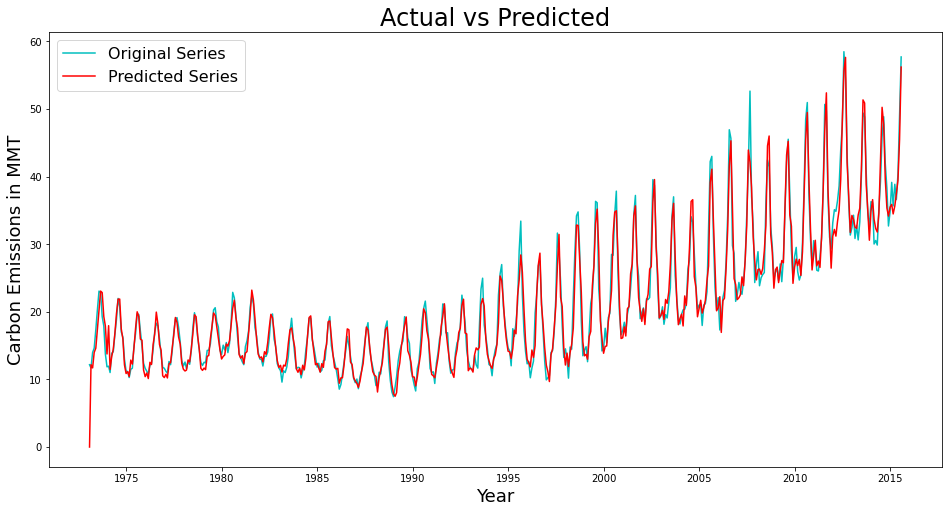

In [50]:
#Plotting the original vs predicted series
plt.figure(figsize=(16,8))
plt.plot(ts_train, color = 'c', label = 'Original Series')
plt.plot(predictions_SARIMA, color = 'r', label = 'Predicted Series')
plt.title('Actual vs Predicted', fontsize=24)
# plt.ylim(0,200)
plt.ylabel('Carbon Emissions in MMT', fontsize = 18)
plt.xlabel('Year', fontsize = 18)
plt.legend(fontsize=16)
plt.show()

In [51]:
#Forecasting the values for next 12 months
forecasted_SARIMA = results_SARIMA.forecast(steps=12) # here steps represent the number of months
forecasted_SARIMA

2015-08-31    57.292566
2015-09-30    46.984662
2015-10-31    41.004008
2015-11-30    36.263785
2015-12-31    38.533377
2016-01-31    40.015523
2016-02-29    36.385068
2016-03-31    37.877546
2016-04-30    37.130864
2016-05-31    41.335677
2016-06-30    47.787057
2016-07-31    56.501432
Freq: M, Name: predicted_mean, dtype: float64

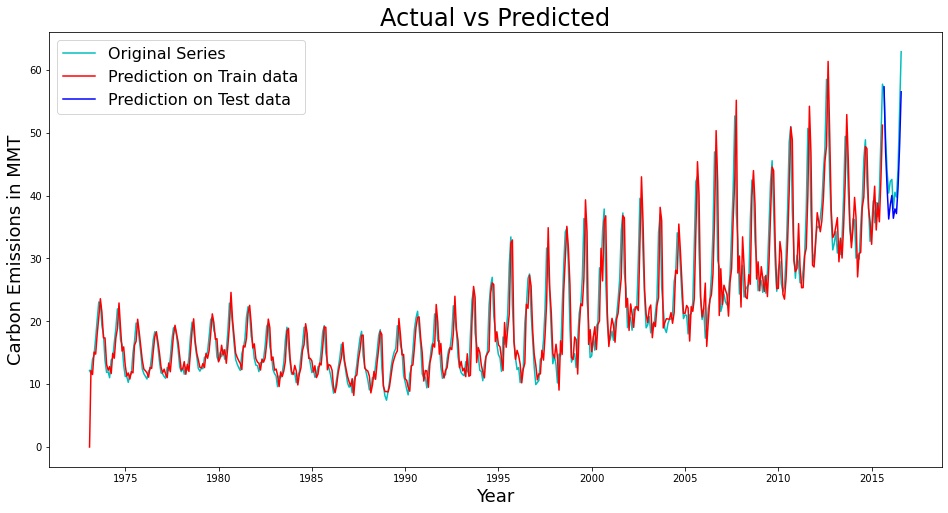

In [52]:
plt.figure(figsize=(16,8))
plt.plot(ts_mte, color = 'c', label = 'Original Series')
plt.plot(predictions_ARIMA, color = 'r', label = 'Prediction on Train data')
plt.plot(forecasted_SARIMA, label = 'Prediction on Test data', color='b')
plt.title('Actual vs Predicted', fontsize=24)
plt.ylabel('Carbon Emissions in MMT', fontsize = 18)
plt.xlabel('Year', fontsize = 18)
plt.legend(fontsize=16)
plt.show()

### Observation and Insight:
1. Adding the seasonality, the forecast data fits the dataset much better than ARIMA. The predicted data overlaps the original series very good. 
2. SARIMA is more suitable than ARIMA when there is seasonality. 

In [53]:
error_predictions_SARIMA = mean_squared_error(predictions_SARIMA, ts_train, squared = False)
error_predictions_SARIMA

1.8806147341634665

In [54]:
error_forecasted_SARIMA = mean_squared_error(forecasted_SARIMA.iloc[:12,], ts_test, squared = False)
error_forecasted_SARIMA

3.5295977986157956

### Observation and Insight:
1. The prediction MSE is lower in SARIMA than in ARIMA. 
2. The forecasted MSE is also much lower than in ARIMA. 

## **Conclusion**

1. SARIMA model is the best model to predict the CO2 emission from natural gas.

2. AR, MA, and ARIMA are not sufficient. Need to combine all three approach with seasonility. 

3. Further optimization may be possible to finding the optimal differencing 'd' value. 

4. Natural gas carbon dioxide emissing trend is increasing and can become a dominant coal. Currently coal is the dominant carbon dioxide emitter but coal usage is decreasing. Soon natural gas will take over so have to find ways to fina an alternative energy source for natural gas. 
